This project demonstrates how you can use sentiment analysis from news articles to build a trading strategy


In [1]:
import pandas as pd

df = pd.read_csv('news_bitcoin_2020-01-01_2022-12-31.csv', parse_dates=True, index_col='date').sort_index()
df=df[:'2023-01-01']
df

,Unnamed: 0,title,link
date,,,
2020-01-01 08:00:00+00:00,18,Worst Bitcoin Price Prediction of 2019,{'https://consent.google.com/articles/CBMiRWh0...
2020-01-01 08:00:00+00:00,30,Bitcoin: 4 Big Competitive Advantages Over Alt...,{'https://consent.google.com/articles/CBMiWWh0...
2020-01-01 08:00:00+00:00,38,"From crypto currency to chocolate, where to sp...",{'https://consent.google.com/articles/CBMiXGh0...
2020-01-01 08:00:00+00:00,53,"Bitcoin Price Will Crash Below $1k in 2020, Ze...",{'https://consent.google.com/articles/CBMiZGh0...
2020-01-03 08:00:00+00:00,47,Happy birthday Bitcoin! Celebrating the life o...,{'https://consent.google.com/articles/CBMiVWh0...
...,...,...,...
2022-12-29 08:00:00+00:00,66,Will This Country Be the Next to Make Bitcoin ...,{'https://consent.google.com/articles/CBMiW2h0...
2022-12-30 08:00:00+00:00,10,What Do Bitcoin Investors Need To Know In Thes...,{'https://consent.google.com/articles/CBMicGh0...
2022-12-30 08:00:00+00:00,14,Billionaire Mark Cuban Reveals When He’d Buy B...,{'https://consent.google.com/articles/CBMivgFo...


We use vaders sentiment analyser to score the cleaned article title. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

One of the biggest advantages of VADER is that it does not require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon.


In [2]:
from sentiment_analyser import SentimentAnalyser

sentiment_analyser = SentimentAnalyser()

df = sentiment_analyser.get_sentiment_score(df)
df

,Unnamed: 0,title,link,title_normalized,sentiment_score
date,,,,,
2020-01-01 08:00:00+00:00,18,Worst Bitcoin Price Prediction of 2019,{'https://consent.google.com/articles/CBMiRWh0...,worst bitcoin price predict,-0.6249
2020-01-01 08:00:00+00:00,30,Bitcoin: 4 Big Competitive Advantages Over Alt...,{'https://consent.google.com/articles/CBMiWWh0...,bitcoin : big competit advantag altcoin,0.0000
2020-01-01 08:00:00+00:00,38,"From crypto currency to chocolate, where to sp...",{'https://consent.google.com/articles/CBMiXGh0...,"crypto currenc chocol , spend bitcoin",0.0000
2020-01-01 08:00:00+00:00,53,"Bitcoin Price Will Crash Below $1k in 2020, Ze...",{'https://consent.google.com/articles/CBMiZGh0...,"bitcoin price crash $ k , zengo ceo joke predict",-0.1280
2020-01-03 08:00:00+00:00,47,Happy birthday Bitcoin! Celebrating the life o...,{'https://consent.google.com/articles/CBMiVWh0...,happi birthday bitcoin ! celebr life remark -y...,0.0000
...,...,...,...,...,...
2022-12-29 08:00:00+00:00,66,Will This Country Be the Next to Make Bitcoin ...,{'https://consent.google.com/articles/CBMiW2h0...,countri next make bitcoin offici currenc ?,0.0000
2022-12-30 08:00:00+00:00,10,What Do Bitcoin Investors Need To Know In Thes...,{'https://consent.google.com/articles/CBMicGh0...,bitcoin investor need know frozen market ?,0.0000
2022-12-30 08:00:00+00:00,14,Billionaire Mark Cuban Reveals When He’d Buy B...,{'https://consent.google.com/articles/CBMivgFo...,billionair mark cuban reveal would buy bitcoin...,0.3182


Add btc returns and resample ddata to daily


In [3]:
df = sentiment_analyser.add_market_data(df, ticker="BTC-USD", interval='1D')
df

[*********************100%%**********************]  1 of 1 completed


,sentiment_score,returns
date,,
2020-01-01 00:00:00+00:00,-0.7529,NaN
2020-01-02 00:00:00+00:00,0.0000,-0.030273
2020-01-03 00:00:00+00:00,0.0000,0.050172
2020-01-04 00:00:00+00:00,0.3612,0.008915
2020-01-05 00:00:00+00:00,0.5562,0.000089
...,...,...
2022-12-27 00:00:00+00:00,0.3187,-0.012048
2022-12-28 00:00:00+00:00,-0.6364,-0.009895
2022-12-29 00:00:00+00:00,0.3612,0.005409


run the strategy


In [4]:
df = sentiment_analyser.run_strategy(df)
df

,sentiment_score,returns,position,strategy,creturns,cstrategy,long_price,short_price
date,,,,,,,,
2020-01-01 00:00:00+00:00,-0.7529,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,0.0000,-0.030273,0.0,0.030273,0.970181,1.030736,NaN,NaN
2020-01-03 00:00:00+00:00,0.0000,0.050172,0.0,0.000000,1.020098,1.030736,NaN,NaN
2020-01-04 00:00:00+00:00,0.3612,0.008915,1.0,0.000000,1.029233,1.030736,NaN,NaN
2020-01-05 00:00:00+00:00,0.5562,0.000089,1.0,0.000089,1.029325,1.030828,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,0.3187,-0.012048,1.0,0.012048,2.321773,27.532351,2.321773,NaN
2022-12-28 00:00:00+00:00,-0.6364,-0.009895,-1.0,-0.009895,2.298913,27.261261,NaN,2.298913
2022-12-29 00:00:00+00:00,0.3612,0.005409,1.0,-0.005409,2.311380,27.114212,2.311380,NaN


plot the strategy


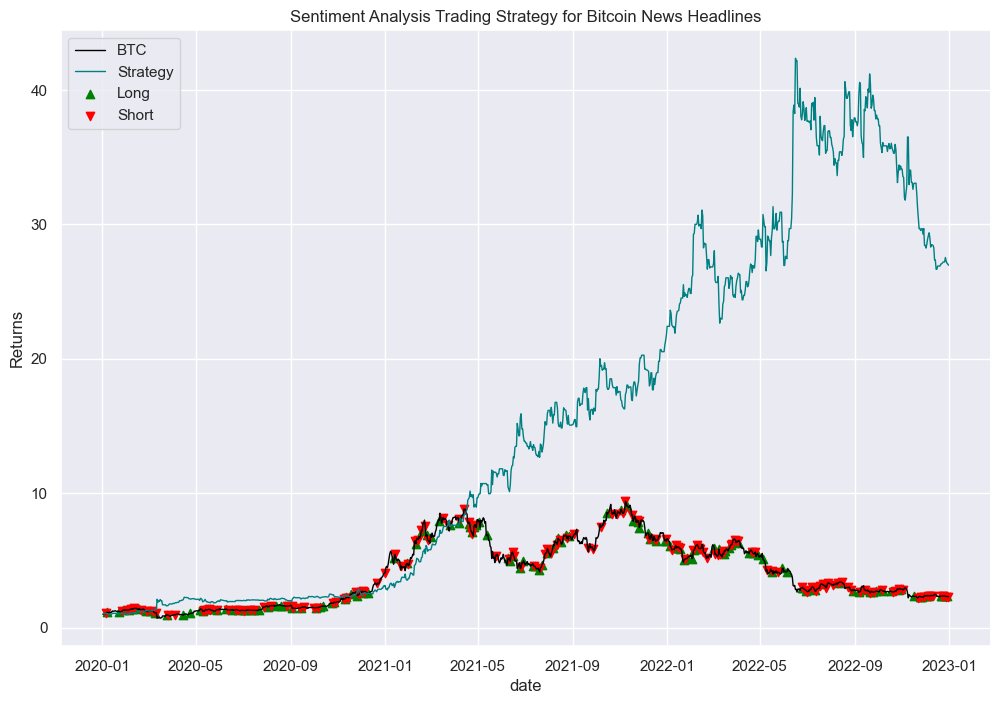

In [5]:
sentiment_analyser.plot_strat(df)